## ELEC3305 Lab 2 -  DTFT <br> <small> Python Lab 2 </small>

### DTFT:

In this part of the lab, we will look at the DTFT of rectangular windows and triangular windows and compare their performances as low-pass filters. There is a code template provided for each part to help you become familiar with numpy syntax.

### Part (a):

In [4]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

Plot the DTFT (at least 512 points) of the rectangular window:

<center>$$ w[n] = \left \{ \begin{array}{cc} 1 & -N \leq n \leq N \\ 0 & \mathrm{otherwise} \end{array} \right. $$ </center>
				
for $ N=5,~20,~100$. Scale the DTFT so that $W(e^{j0})=1$ in your plots. Label your plots! 

Describe the effect of increasing $N$ on the DTFT.

A code template is provided for each part

### Solution for (a):

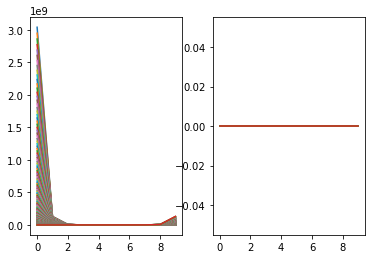

In [12]:
    M = 1024 
    #repeat for N = 5, 20, 100
    for N in [5]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        NN = np.r_[-N:N]

        # create window function (w) using np.ones
        window = np.ones(M)
        
        # create M-point frequency indices (Omega) from -pi to pi (use np.pi)
        omega = np.linspace(-np.pi,np.pi,M)
        
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.outer
        indices = np.outer(NN,omega)
        
        
        # create DTFT matrix using np.exp
        W = np.exp(indices)
        
        # evaluate DTFT using dot function
        dtft = W.dot(M)
         
        # normalize W such that W at omega=0 is 1
        dtft = (1/np.sqrt(N)) * dtft;
        
        
        # create plots
        # plot both real and imag on the same figure using subplots ( use W.real and W.imag )
        # add titles
        fig, axes = plt.subplots(nrows=1, ncols=2)
        axes[0].plot(dtft.real)
        axes[1].plot(dtft.imag)

        
        

Describe the effect of increasing $N$ on the DTFT:



----

### Part (b):

Repeat part (a) for the triangular window:
$$w_\triangle [n] =  \left ( 1- \frac{|n|}{N} \right ) w[n].$$

### Solution for (b):

In [ ]:
    M = 1024
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        ### FILL IN ###
        
        # create window function (w) 
        ### FILL IN ###
        
        
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        ### FILL IN ###
        
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.outer
        ### FILL IN ###
       
        
        # create DTFT matrix using np.exp
        
        
        # evaluate DTFT using dot function
        
         
        # normalize W such that W at omega=0 is 1
        ### FILL IN ###
        
        
        # create plots
        # plot both real and imag on the same figure using subplots ( use W.real and W.imag )
        # add titles
        ### FILL IN ###
      

        

Describe the effect of increasing $N$ on the DTFT:


----

### Part (c):

Consider the ideal low-pass filter with cut-off frequency $\omega_c = 0.3 \pi$. Truncate the impulse response of this filter using the windows in parts (a) and (b), and plot the frequency response of the resulting filters. Explain the differences.


### Solution for (c):

In [ ]:
    M = 1024
    Omegac = 0.3
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        ### FILL IN ###
        
        
        # create window function (w)
        ### FILL IN ###

  
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        ### FILL IN ###
        
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.outer
        ### FILL IN ###
        
        
        # create DTFT matrix using np.exp
        
        
        # evaluate DTFT using dot function
        
         
        # normalize W such that W at omega=0 is 1
        ### FILL IN ###
        
        
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        # add titles
        ### FILL IN ###
 

        

In [ ]:
    M = 1024
    Omegac = 0.3
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        ### FILL IN ###
        
        
        # create window function (w)
        ### FILL IN ###

  
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        ### FILL IN ###
        
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.outer
        ### FILL IN ###
        
        
        # create DTFT matrix using np.exp
        
        
        # evaluate DTFT using dot function
        
         
        # normalize W such that W at omega=0 is 1
        ### FILL IN ###
        
        
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        ### FILL IN ###
 
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        ### FILL IN ###
        